# Pokemon analysis

This script is to analyze different pokemon characteristics, including type, stats, effectiveness and weakness.

Data is from **Complete Pokemon Dataset** (https://www.kaggle.com/mariotormo/complete-pokemon-dataset-updated-090420)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

type_color = pd.Series({
    "Normal": "#9199a1", "Flying": "#8EA8DE",
    "Fire": "#FE9C54", "Psychic": "#F97178",
    "Water": "#4F90D5", "Bug": "#91C02E",
    "Electric": "#F4D23C", "Rock": "#C5B78B",
    "Grass": "#62BB5A", "Ghost": "#5269AC",
    "Ice": "#73CEBF", "Dragon": "#0A6DC2",
    "Fighting": "#CD406A", "Dark": "#5A5365",
    "Poison": "#A96AC8", "Steel": "#5A8DA1",
    "Ground": "#D87844", "Fairy": "#EB8FE6"
})

In [2]:
def merge_type(type_1, type_2):
    """
    Merge pokemon type
    """
    if pd.isnull(type_2):
        return type_1
    else:
        return "_".join(list(sorted([type_1, type_2])))

def box_plot(x, y, data, ax, hue=None, palette=None):
    """
    Draw box plot
    """
    sns.boxplot(x=x, y=y, data=data, hue=hue, showfliers=False, palette=palette, ax=ax)
    sns.stripplot(x=x, y=y, data=data, hue=hue, palette=palette, split=True, jitter=True, linewidth=1, ax=ax)
    ax.set_xlabel("")
    return ax

## 0. Read data

In [3]:
data = pd.read_csv("pokedex_(Update_04.21).csv", index_col=0)

In [4]:
data

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,896,Glastrier,Polaross,ブリザポス (Burizaposu),8,Sub Legendary,Wild Horse Pokémon,1,Ice,NaN,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,897,Spectrier,Phantoross,レイスポス (Reisuposu),8,Sub Legendary,Swift Horse Pokémon,1,Ghost,NaN,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,898,Calyrex,Coronospa,バドレックス (Budrex),8,Legendary,King Pokémon,2,Psychic,Grass,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,898,Calyrex Ice Rider,Coronospa,バドレックス (Budrex),8,Legendary,High King Pokémon,2,Psychic,Ice,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


## 1. Pokemon type population

### 1.1. Collapsed types

In [5]:
poketype = pd.concat([data["type_1"], data["type_2"].dropna()])
type_count = poketype.value_counts()

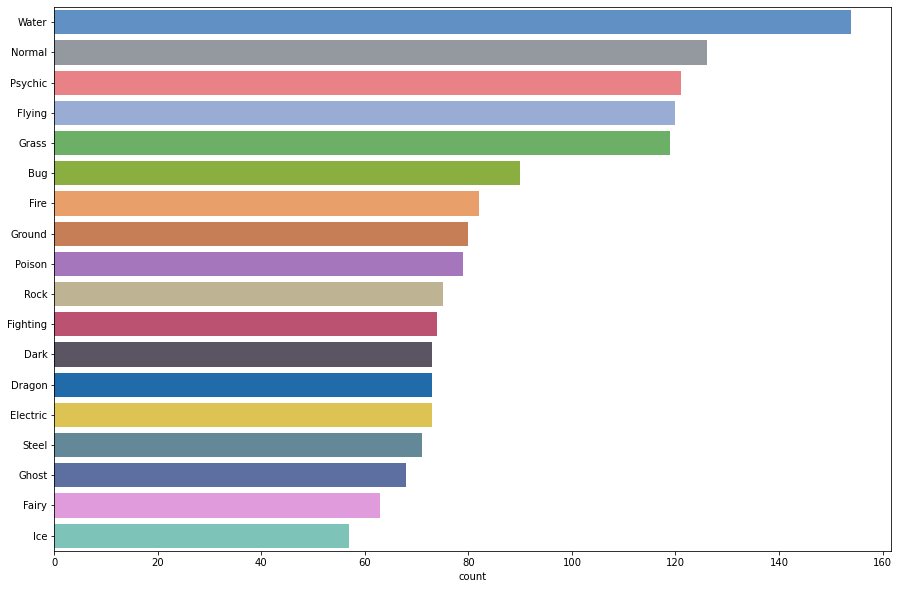

In [6]:
f, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.countplot(y=poketype, order=type_count.index, palette=type_color[type_count.index])
f.show()

### 1.2. Uni-type

In [7]:
poketype = data["type_1"][data["type_2"].isnull()]
type_count = poketype.value_counts()

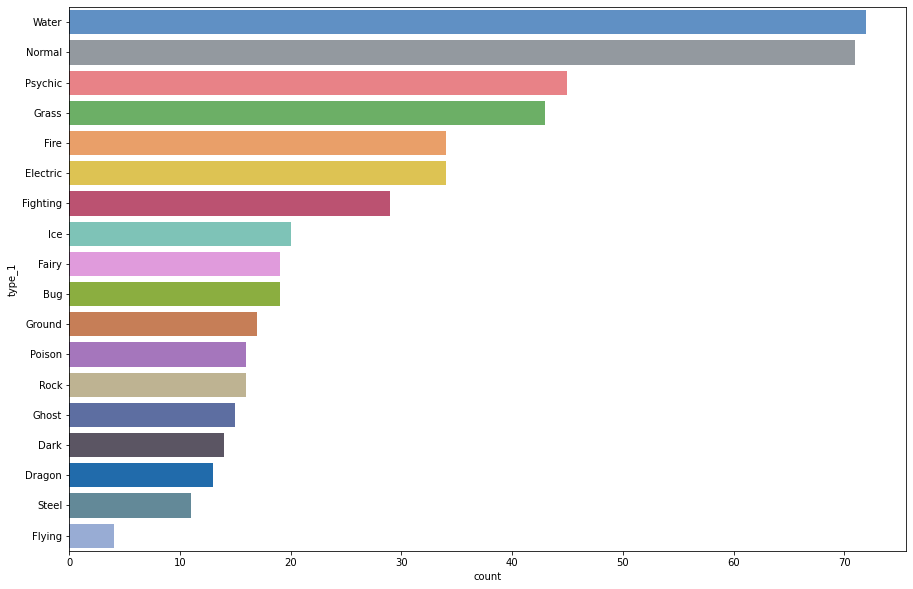

In [8]:
f, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.countplot(y=poketype, order=type_count.index, palette=type_color[type_count.index])
f.show()

### 1.3. Multi-type 

In [9]:
poketype = data.loc[data["type_2"].notnull(),][["type_1", "type_2"]].apply(lambda x: merge_type(x["type_1"], x["type_2"]), axis=1)
type_count = poketype.value_counts()

#### 1.3.1. most common multi-type

In [10]:
type_count[type_count >= 10]

Flying_Normal    27
Grass_Poison     15
Bug_Flying       14
Bug_Poison       13
Ghost_Grass      12
Rock_Water       11
Ground_Water     10
dtype: int64

#### 1.3.2. multi-type with only one pokemon

In [11]:
type_unique = type_count[type_count == 1]
type_unique.sort_index()

Bug_Ghost           1
Dragon_Fairy        1
Dragon_Normal       1
Electric_Fire       1
Electric_Ghost      1
Electric_Grass      1
Electric_Ground     1
Electric_Psychic    1
Fairy_Ghost         1
Fairy_Ice           1
Fairy_Poison        1
Fighting_Ghost      1
Fighting_Ice        1
Fighting_Rock       1
Fire_Ice            1
Fire_Steel          1
Fire_Water          1
Ghost_Ice           1
Grass_Ground        1
Ground_Normal       1
Normal_Water        1
Poison_Rock         1
Steel_Water         1
dtype: int64

In [12]:
data.loc[poketype[poketype.isin(type_unique.index)].index,:]

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
35,26,Alolan Raichu,Raichu,ライチュウ (Raichu),1,Normal,Mouse Pokémon,2,Electric,Psychic,...,2.0,0.5,1.0,1.00,1.0,1.0,1.0,1.0,0.50,1.00
51,38,Alolan Ninetales,Vulnona,キュウコン (Kyukon),1,Normal,Fox Pokémon,2,Ice,Fairy,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.50,0.50
144,110,Galarian Weezing,Smogmog,マタドガス (Matadogas),1,Normal,Poison Gas Pokémon,2,Poison,Fairy,...,2.0,1.0,2.0,0.50,1.0,1.0,1.0,1.0,1.00,0.50
351,292,Shedinja,Ninjatom,ヌケニン (Nukenin),3,Normal,Shed Pokémon,2,Bug,Ghost,...,0.0,2.0,0.0,0.00,2.0,2.0,0.0,2.0,0.00,0.00
401,334,Mega Altaria,Altaria,チルタリス (Tyltalis),3,Normal,Humming Pokémon,2,Dragon,Fairy,...,1.0,1.0,1.0,0.50,1.0,1.0,0.0,0.5,2.00,2.00
472,389,Torterra,Chelterrar,ドダイトス (Dodaitose),4,Normal,Continent Pokémon,2,Grass,Ground,...,0.5,2.0,1.0,2.00,0.5,1.0,1.0,1.0,1.00,1.00
478,395,Empoleon,Impoleon,エンペルト (Emperte),4,Normal,Emperor Pokémon,2,Water,Steel,...,2.0,0.5,0.5,0.50,0.5,1.0,0.5,1.0,0.25,0.50
483,400,Bibarel,Bidifas,ビーダル (Beadaru),4,Normal,Beaver Pokémon,2,Normal,Water,...,1.0,1.0,1.0,1.00,1.0,0.0,1.0,1.0,0.50,1.00
568,478,Froslass,Frosdedje,ユキメノコ (Yukimenoko),4,Normal,Snow Land Pokémon,2,Ice,Ghost,...,1.0,1.0,1.0,0.50,2.0,2.0,1.0,2.0,2.00,1.00
569,479,Rotom,Rotom,ロトム (Rotom),4,Normal,Plasma Pokémon,2,Electric,Ghost,...,0.0,0.5,1.0,0.50,1.0,2.0,1.0,2.0,0.50,1.00


#### 1.3.3. non-existing multi-type

In [13]:
all_poketype = [merge_type(t1, t2) for t1 in type_color.index for t2 in type_color.index if t1 != t2]
all_poketype = pd.Series(np.unique(all_poketype))
non_poketype = all_poketype[~all_poketype.isin(type_count.index)]

In [14]:
non_poketype

0               Bug_Dark
1             Bug_Dragon
11            Bug_Normal
49     Electric_Fighting
62        Fairy_Fighting
63            Fairy_Fire
67          Fairy_Ground
79       Fighting_Ground
89            Fire_Grass
111         Ghost_Normal
114           Ghost_Rock
132           Ice_Normal
133           Ice_Poison
138        Normal_Poison
140          Normal_Rock
141         Normal_Steel
145         Poison_Steel
dtype: object

## 2. Pokemon stats

### 2.1. Strongest and weakest Pokemon

In [15]:
data.loc[data["total_points"] > 750,:]

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
194,150,Mega Mewtwo X,Mewtu,ミュウツー (Mewtwo),1,Legendary,Genetic Pokémon,2,Psychic,Fighting,...,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0
195,150,Mega Mewtwo Y,Mewtu,ミュウツー (Mewtwo),1,Legendary,Genetic Pokémon,1,Psychic,NaN,...,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0
460,382,Primal Kyogre,Kyogre,カイオーガ (Kyogre),3,Legendary,Sea Basin Pokémon,1,Water,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
462,383,Primal Groudon,Groudon,グラードン (Groudon),3,Legendary,Continent Pokémon,2,Ground,Fire,...,2.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5
464,384,Mega Rayquaza,Rayquaza,レックウザ (Rayquaza),3,Legendary,Sky High Pokémon,2,Dragon,Flying,...,0.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,2.0
936,800,Ultra Necrozma,Necrozma,ネクロズマ (Necrozma),7,Legendary,Prism Pokémon,2,Psychic,Dragon,...,1.0,1.0,0.5,2.0,1.0,2.0,2.0,2.0,1.0,2.0
1033,890,Eternatus Eternamax,Endynalos,ムゲンダイナ (Mugendina),8,Legendary,Gigantic Pokémon,2,Poison,Dragon,...,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


In [16]:
data.loc[data["total_points"] < 200,:]

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
13,10,Caterpie,Raupy,キャタピー (Caterpie),1,Normal,Worm Pokémon,1,Bug,NaN,...,0.5,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
16,13,Weedle,Hornliu,ビードル (Beedle),1,Normal,Hairy Bug Pokémon,2,Bug,Poison,...,1.0,2.0,2.0,0.5,2.0,1.0,1.0,1.0,1.0,0.5
237,191,Sunkern,Sonnkern,ヒマナッツ (Himanuts),2,Normal,Seed Pokémon,1,Grass,NaN,...,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
323,265,Wurmple,Waumpel,ケムッソ (Kemusso),3,Normal,Worm Pokémon,1,Bug,NaN,...,0.5,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
338,280,Ralts,Trasla,ラルトス (Ralts),3,Normal,Feeling Pokémon,2,Psychic,Fairy,...,1.0,1.0,0.5,1.0,1.0,2.0,0.0,1.0,2.0,1.0
357,298,Azurill,Azurill,ルリリ (Ruriri),3,Normal,Polka Dot Pokémon,2,Normal,Fairy,...,1.0,1.0,1.0,0.5,1.0,0.0,0.0,0.5,2.0,1.0
484,401,Kricketot,Zirpurze,コロボーシ (Korobohshi),4,Normal,Cricket Pokémon,1,Bug,NaN,...,0.5,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
877,746,Wishiwashi Solo Form,Lusardin,ヨワシ (Yowashi),7,Normal,Small Fry Pokémon,1,Water,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
960,824,Blipbug,Sensect,サッチムシ (Sacchimushi),8,Normal,Larva Pokémon,1,Bug,NaN,...,0.5,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1009,872,Snom,Snomnom,ユキハミ (Yukihami),8,Normal,Worm Pokémon,2,Ice,Bug,...,0.5,2.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,1.0


### 2.2. Pokemon stats v.s. generation

In [17]:
stats_gen = data.groupby(by=["generation"])["total_points"].mean()
stats_gen

generation
1    424.104167
2    419.140187
3    436.006061
4    459.016529
5    435.157895
6    442.552941
7    459.232323
8    455.933333
Name: total_points, dtype: float64

/home/mzzhang/app/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


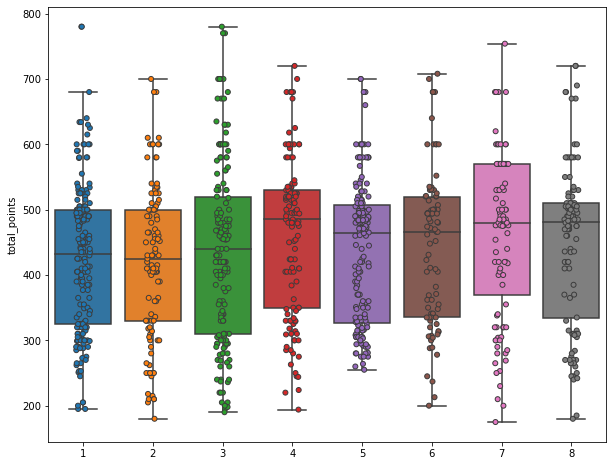

In [18]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
box_plot(data=data.loc[data["total_points"] < 1000], y="total_points", x="generation", ax=ax)
f.show()

### 2.3. Pokemon stats v.s. type

In [19]:
stats1 = data[["type_1", "total_points"]].rename(columns={"type_1": "type"})
stats2 = data[["type_2", "total_points"]].rename(columns={"type_2": "type"})
stats2 = stats2.loc[stats2["type"].notnull(),:]
pokestats = pd.concat([stats1, stats2])
stats_type = pokestats.groupby(by="type").mean().sort_values(by="total_points", ascending=False)
stats_type.insert(loc=0, column="rank", value=list(range(1, 19)))
stats_type

,rank,total_points
type,,
Dragon,1,539.945205
Steel,2,489.985915
Psychic,3,485.685950
Fighting,4,478.662162
Ice,5,464.035088
Fire,6,462.329268
Flying,7,454.716667
Ghost,8,454.588235
Dark,9,453.342466


/home/mzzhang/app/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


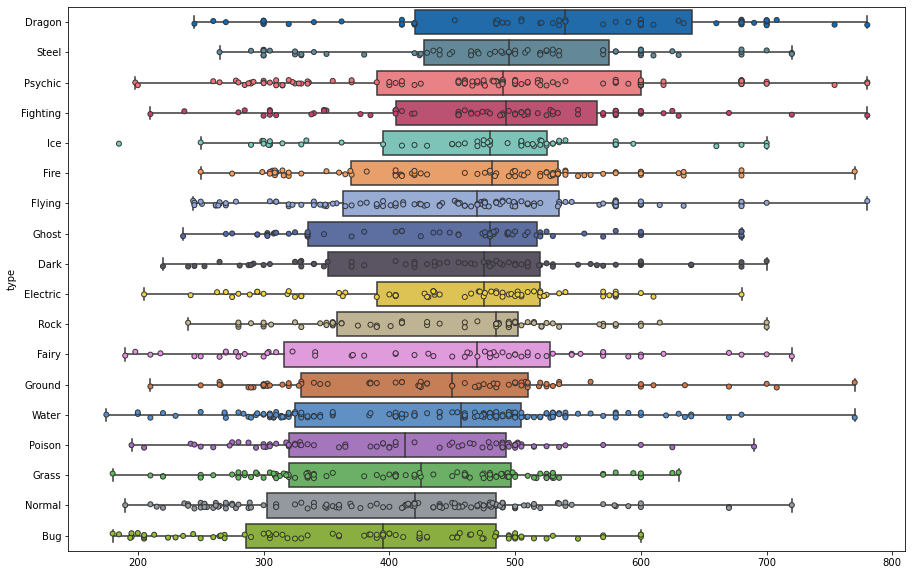

In [20]:
pokestats["rank"] = pokestats["type"].apply(lambda x: stats_type["rank"][x])
pokestats = pokestats.sort_values(by=["rank"])
f, ax = plt.subplots(1, 1, figsize=(15, 10))
box_plot(data=pokestats.loc[pokestats["total_points"] < 1000,:], x="total_points", y="type", palette=type_color[stats_type.index], ax=ax)
f.show()

### 2.4. Pokemon attack stats v.s. type

In [21]:
data["total_attack"] = (data["attack"] + data["sp_attack"]) / 2
stats1 = data[["type_1", "total_attack"]].rename(columns={"type_1": "type"})
stats2 = data[["type_2", "total_attack"]].rename(columns={"type_2": "type"})
stats2 = stats2.loc[stats2["type"].notnull(),:]
pokestats = pd.concat([stats1, stats2])
stats_type = pokestats.groupby(by="type").mean().sort_values(by="total_attack", ascending=False)
stats_type.insert(loc=0, column="rank", value=list(range(1, 19)))
stats_type

,rank,total_attack
type,,
Dragon,1,98.924658
Fighting,2,87.121622
Fire,3,86.756098
Psychic,4,85.380165
Steel,5,84.070423
Dark,6,83.404110
Ghost,7,81.661765
Electric,8,81.513699
Ice,9,81.263158


/home/mzzhang/app/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


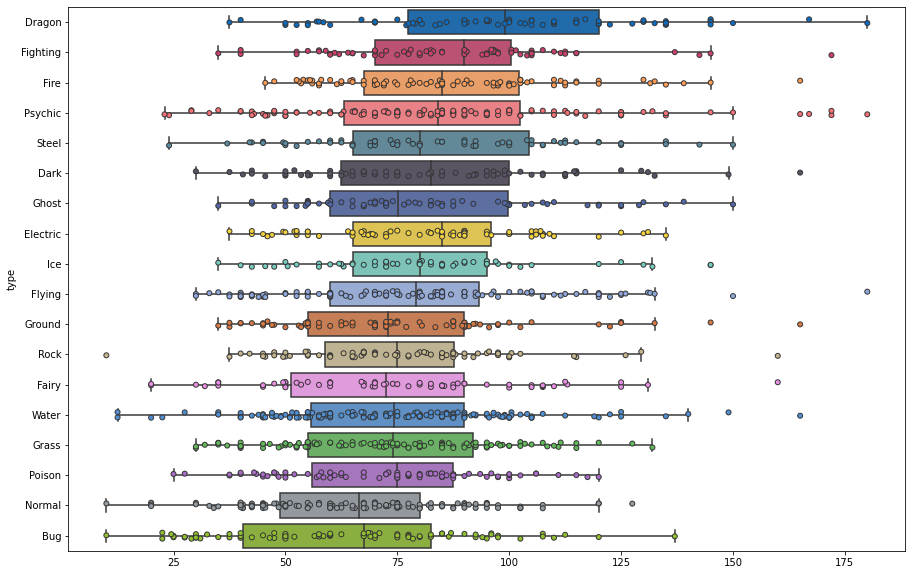

In [22]:
pokestats["rank"] = pokestats["type"].apply(lambda x: stats_type["rank"][x])
pokestats = pokestats.sort_values(by=["rank"])
f, ax = plt.subplots(1, 1, figsize=(15, 10))
box_plot(data=pokestats, x="total_attack", y="type", palette=type_color[stats_type.index], ax=ax)
f.show()

### 2.5. Pokemon defense stats v.s. type

In [23]:
data["total_defense"] = (data["defense"] + data["sp_defense"]) / 2
stats1 = data[["type_1", "total_defense"]].rename(columns={"type_1": "type"})
stats2 = data[["type_2", "total_defense"]].rename(columns={"type_2": "type"})
stats2 = stats2.loc[stats2["type"].notnull(),:]
pokestats = pd.concat([stats1, stats2])
stats_type = pokestats.groupby(by="type").mean().sort_values(by="total_defense", ascending=False)
stats_type.insert(loc=0, column="rank", value=list(range(1, 19)))
stats_type

,rank,total_defense
type,,
Steel,1,96.035211
Rock,2,87.733333
Dragon,3,86.130137
Psychic,4,82.500000
Ghost,5,80.161765
Fairy,6,79.769841
Ice,7,77.894737
Ground,8,77.000000
Fighting,9,75.283784


/home/mzzhang/app/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


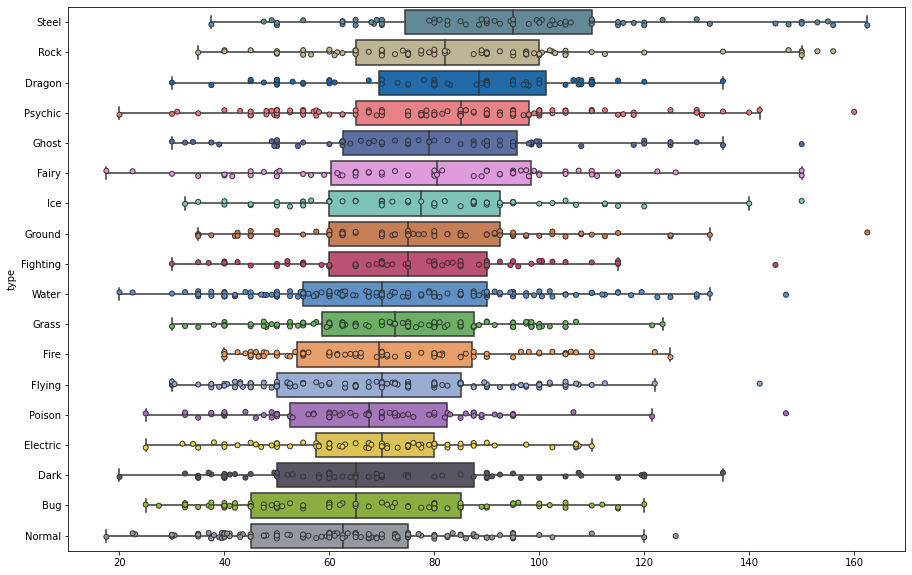

In [24]:
pokestats["rank"] = pokestats["type"].apply(lambda x: stats_type["rank"][x])
pokestats = pokestats.sort_values(by=["rank"])
f, ax = plt.subplots(1, 1, figsize=(15, 10))
box_plot(data=pokestats.loc[pokestats["total_defense"] < 200], x="total_defense", y="type", palette=type_color[stats_type.index], ax=ax)
f.show()

## 3. Pokemon weakness

In [25]:
cols = data.columns
cols_weak = cols[cols.to_series().str.contains("against_")]
data_weak = data[["type_1", "type_2"] + list(cols_weak)]
data_weak = data_weak.replace(to_replace=0, value=0.125)
data_weak["weak"] = np.log2(data_weak.iloc[:,2:]).apply(sum, axis=1)
weak1 = data_weak[["type_1", "weak"]].rename(columns={"type_1": "type"})
weak2 = data_weak[["type_2", "weak"]].rename(columns={"type_2": "type"})
weak2 = weak2.loc[weak2["type"].notnull(),:]
pokeweak = pd.concat([weak1, weak2])
weak_type = pokeweak.groupby(by="type").mean().sort_values(by="weak")
weak_type.insert(loc=0, column="rank", value=list(range(1, 19)))
weak_type

,rank,weak
type,,
Steel,1,-10.843736
Ghost,2,-8.071031
Fairy,3,-5.269841
Fire,4,-4.571098
Flying,5,-4.500000
Electric,6,-4.306249
Poison,7,-3.987342
Ground,8,-3.985376
Dark,9,-3.712329


/home/mzzhang/app/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


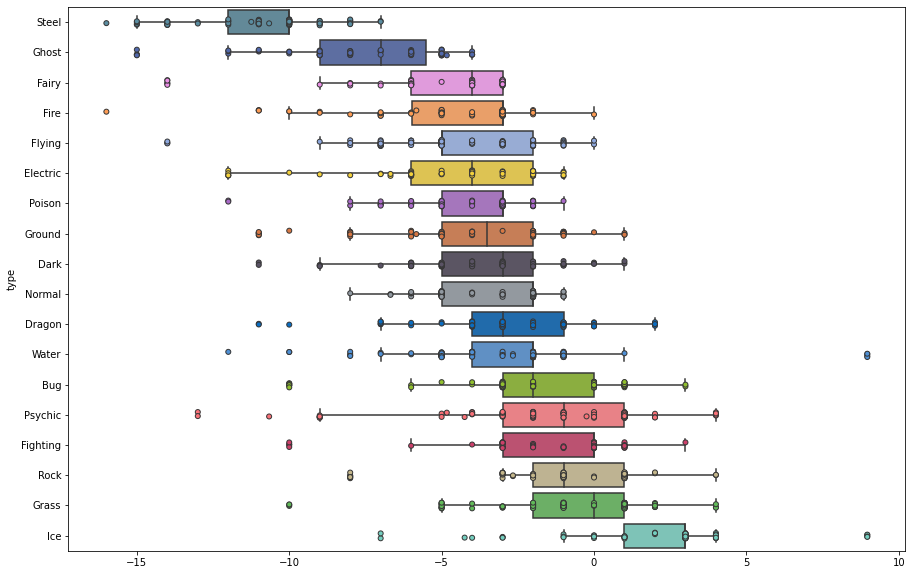

In [26]:
pokeweak["rank"] = pokeweak["type"].apply(lambda x: weak_type["rank"][x])
pokeweak = pokeweak.sort_values(by=["rank"])
f, ax = plt.subplots(1, 1, figsize=(15, 10))
box_plot(data=pokeweak.loc[pokeweak["weak"] > -30,:], x="weak", y="type", palette=type_color[weak_type.index], ax=ax)
f.show()